# Test 42: The Cochran test for consistency in an n × K table of dichotomous data

## Objective

- You have an $n \times K$ table
- Each row is 1 sample
- Each column is 1 category
- For a single observation, the value can either be 1 or 0 (dichotomous outcome) (i.e. the values can only be 0 or 1)
- Is there sufficient evidence to reject the null that all observations have values distributed the same way among all categories?

## Assumptions

- The $K$ observations are on the same $n$ elements
- The observations are dichotomous; observations are represented by 0 or 1
- The count of elements should be large, at least 10

## Method

- You have an $n \times K$ table
- Let $R_i$ be the row total of row $i$
- Let $C_j$ be the row total of column $j$
- Let $S$ be the overall total $S = \sum R_i = \sum C_j$

- Then the test statistic is
$$\begin{aligned}
    Q &= K(K-1) \cdot \frac{\sum_j (C_j - \frac{S}{K})^2}{\sum_i R_i \cdot (K - R_i)}
\end{aligned}$$

- This follows a $\chi^2$ distribution with $K-1$ degrees of freedom

- The null hypothesis is: the $n$ samples have the same distributions across $K$ categories

## Example

- A panel of $n$ expert judges assess whether each of four book cover formats is acceptable or not. 
- Each of $K$ book cover formats, therefore, receives either a yes/no for acceptability

## Proof

In [28]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [50]:
K = 20
N = 30

def get_test_statistic():
    samples = np.array([
        random.choices([0,1], k=K, weights=[0.3,0.7]) for _ in range(N)
    ]).reshape(N, K)

    sum_cj = np.sum(samples, axis=0)
    sum_ri = np.sum(samples, axis=1)
    overall_total = np.sum(sum_cj)
    cbar = sum_cj / K

    # test_statistic = (
    #     (K * (K-1) * np.sum([(cj - cbar)**2 for cj in sum_cj])) / 
    #     ((K * overall_total) - np.sum([ri**2 for ri in sum_ri]))
    # )
    test_statistic = (
        K * (K-1) * (
            np.sum([(cj - (overall_total/K))**2 for cj in sum_cj]) /
            np.sum([ri * (K - ri) for ri in sum_ri])
        )
    )
    return test_statistic

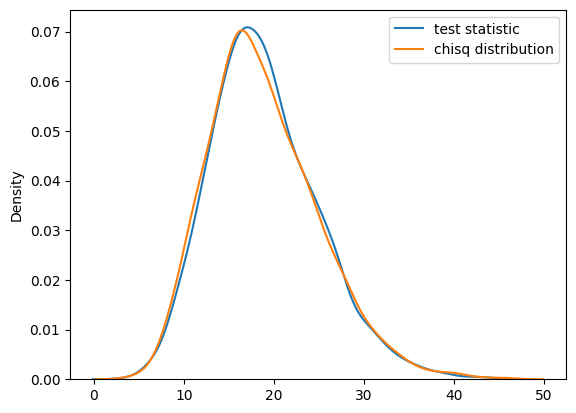

In [51]:
test_statistic_distribution = [get_test_statistic() for _ in range(3_000)]
true_chisq_distribution = np.random.chisquare(K-1, 3_000)

sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_chisq_distribution, label='chisq distribution')
plt.legend()